# Iris Dataset Analysis

In this notebook, we will analyze the famous Iris dataset. The dataset contains the following features:
- Sepal length
- Sepal width
- Petal length
- Petal width

The goal of this analysis is to:
1. Explore the dataset using summary statistics and visualizations.
2. Investigate the correlation between different features.
3. Perform Principal Component Analysis (PCA) for dimensionality reduction.
4. Perform ANOVA to compare features across different species.

We will display histograms, scatter plots, box plots, and perform PCA for data visualization.


## 1. Loading and Exploring the Iris Dataset
We will first load the Iris dataset and display the first few rows to verify that it is loaded correctly.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load the Iris dataset from the given URL
df = pd.read_csv("https://gist.github.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

# Display the first few rows to verify the dataset is loaded properly
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Summary Statistics and Correlation Matrix
Now, we will generate summary statistics for the dataset and calculate the correlation matrix to understand the relationships between different features.


In [3]:
def output_summary(df):
    summary = df.describe()
    display(summary)  # Jupyter will display the DataFrame when it's returned
    # Exclude the 'species' column for correlation
    correlation_matrix = df.drop('species', axis=1).corr()
    display(correlation_matrix)  # Display the correlation matrix

output_summary(df)


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## 3. Histograms of Each Feature
In this section, we will generate histograms for each feature (sepal length, sepal width, petal length, and petal width) to visualize their distributions.


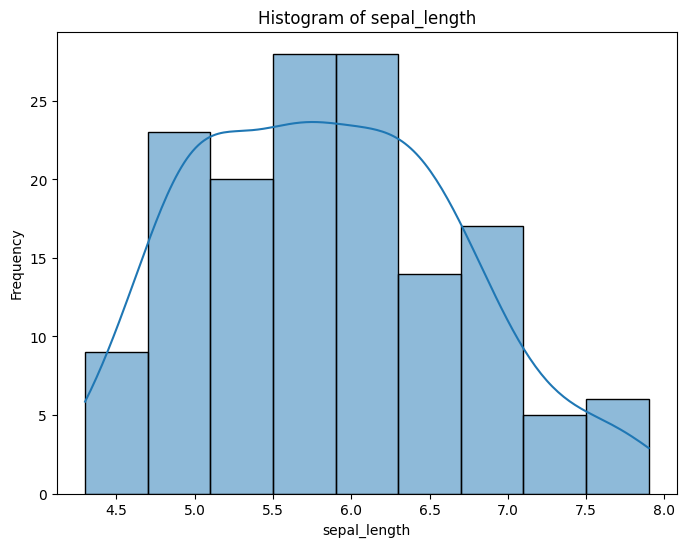

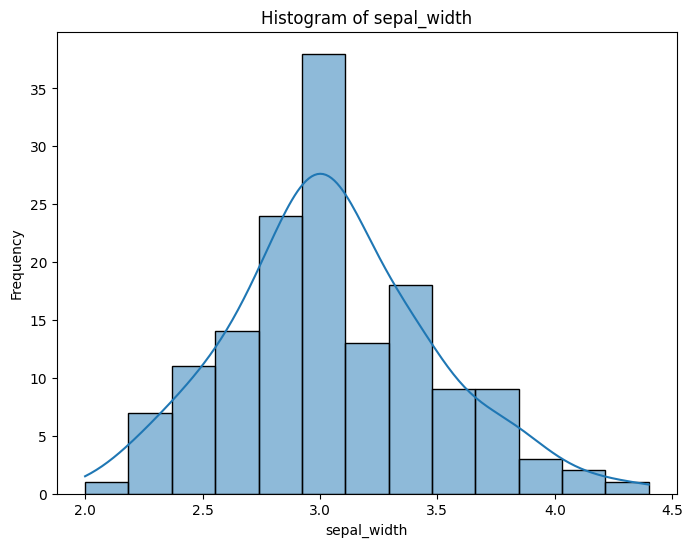

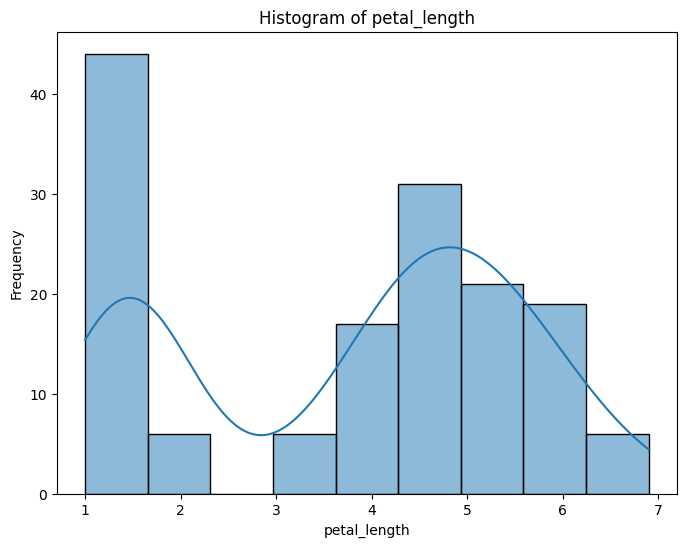

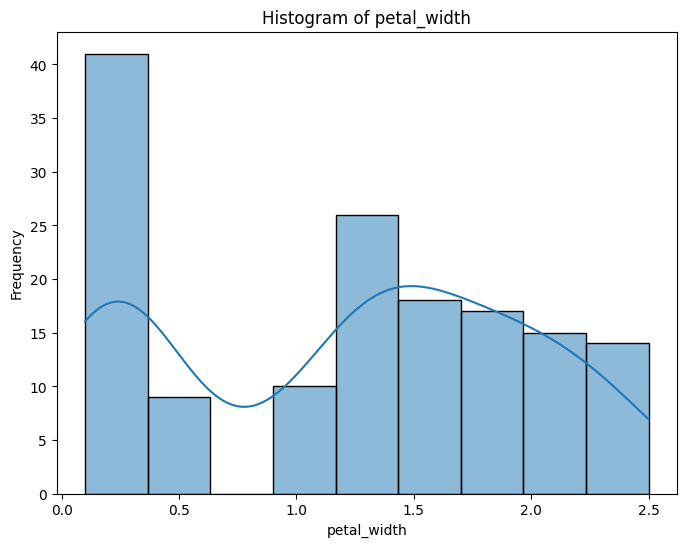

In [4]:
def plot_histograms(df):
    for column in df.columns[:-1]:  # Skip the 'species' column
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  # This will display the plot directly in the notebook

plot_histograms(df)


## 4. Scatter Plots of Feature Pairs
Next, we will generate scatter plots for each pair of features. This will help us visualize how the features are related and if there are any obvious clusters based on species.


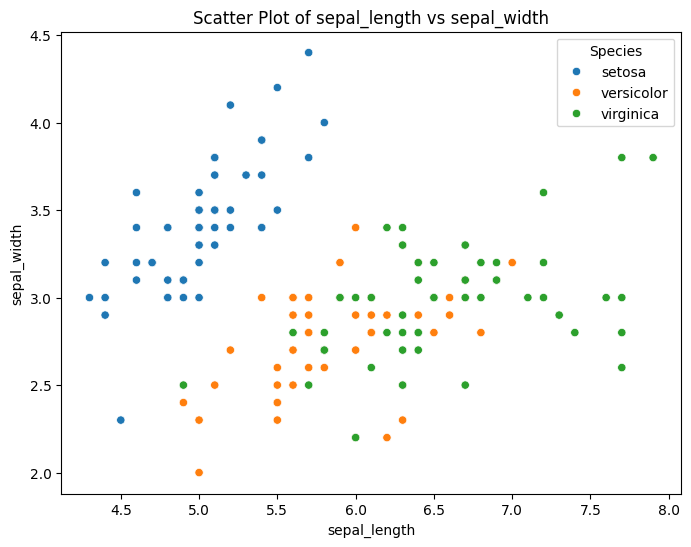

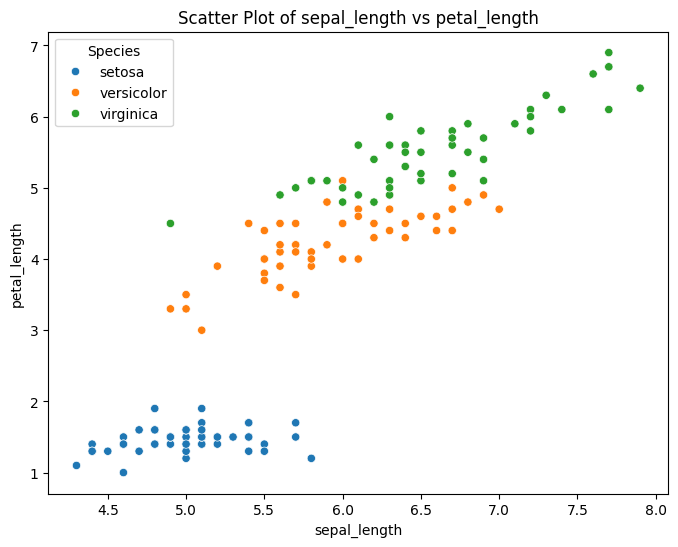

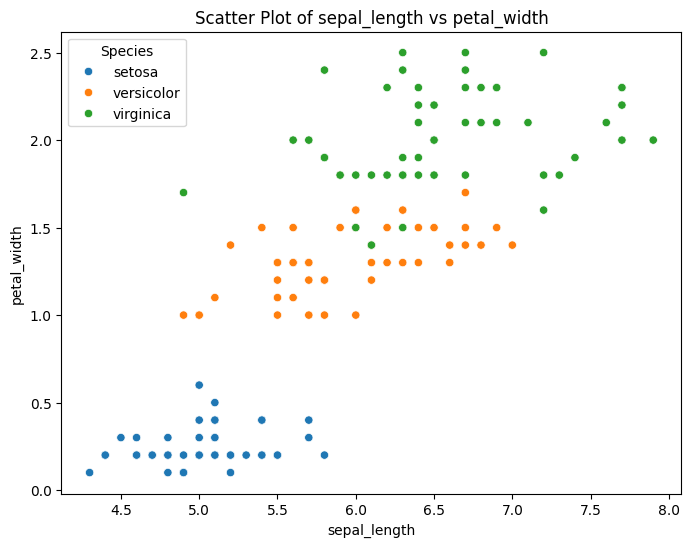

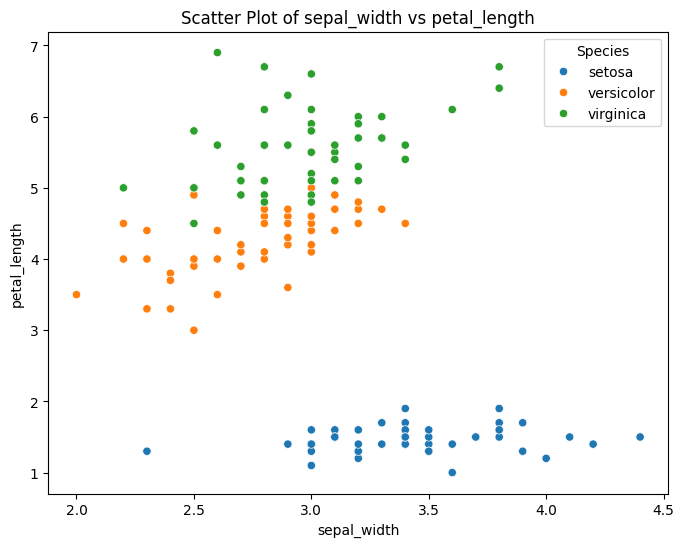

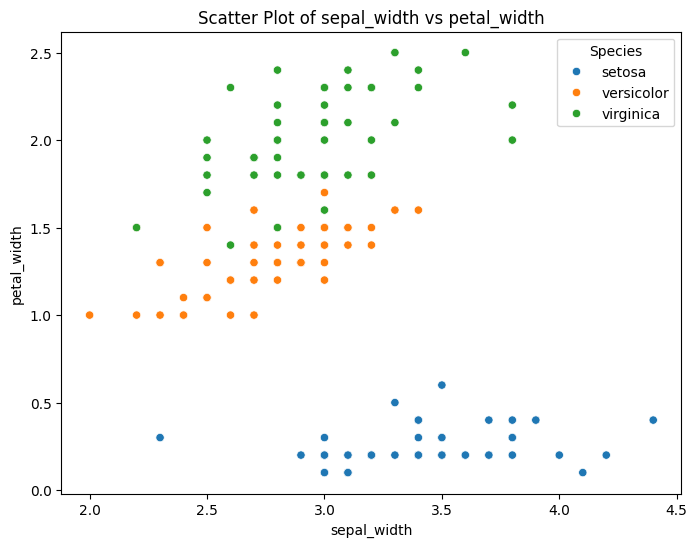

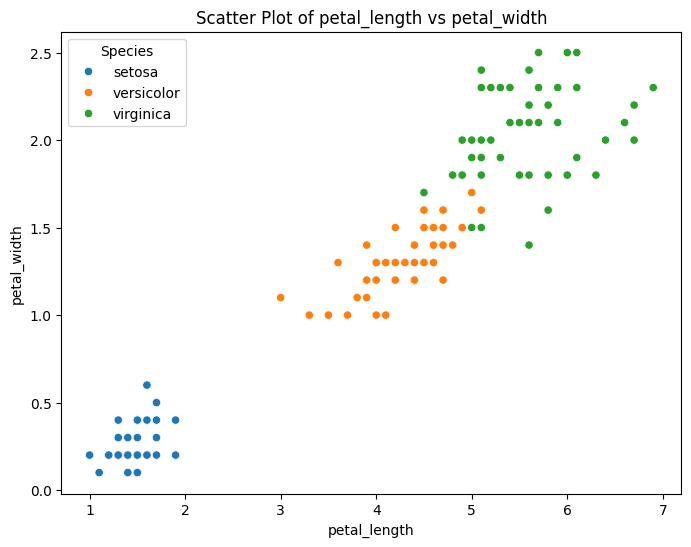

In [5]:
def plot_scatter_plots(df):
    feature_columns = df.columns[:-1]  # Exclude 'species' column
    for i, col1 in enumerate(feature_columns):
        for col2 in feature_columns[i+1:]:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[col1], y=df[col2], hue=df['species'])
            plt.title(f'Scatter Plot of {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend(title='Species')
            plt.show()  # This will display the plot directly in the notebook

plot_scatter_plots(df)


## 5. Correlation Matrix and Box Plots
We will now visualize the correlation matrix to better understand the relationships between features, and also generate box plots for each feature across different species.


Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


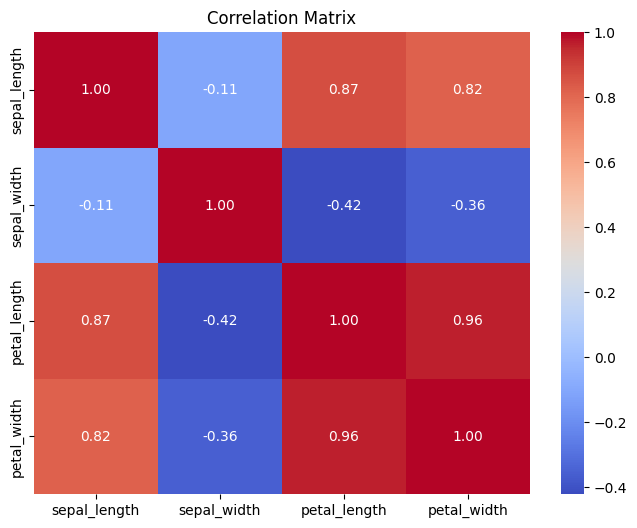

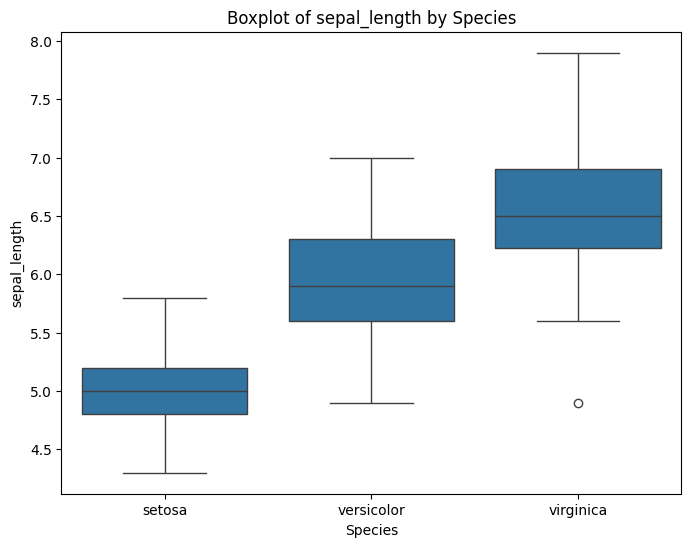

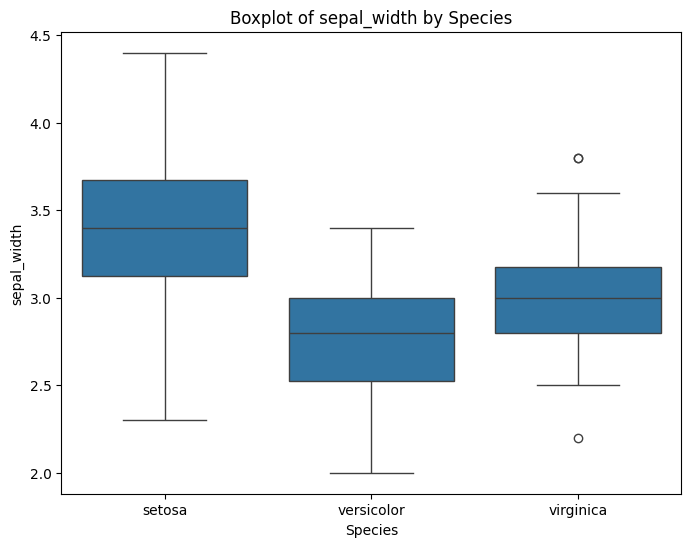

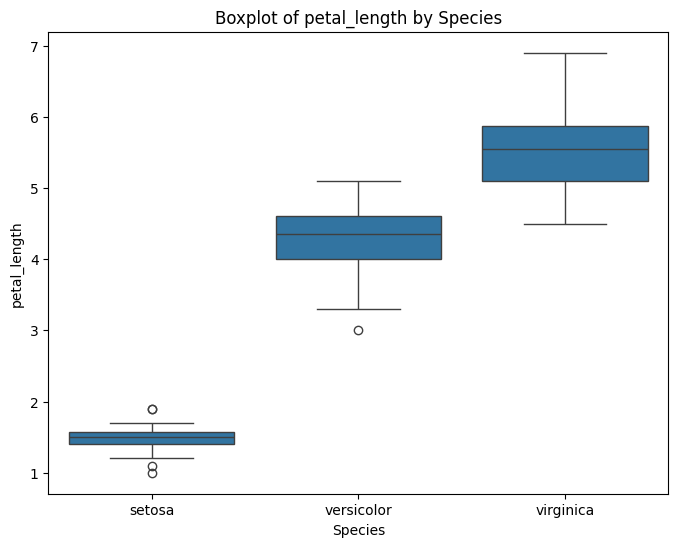

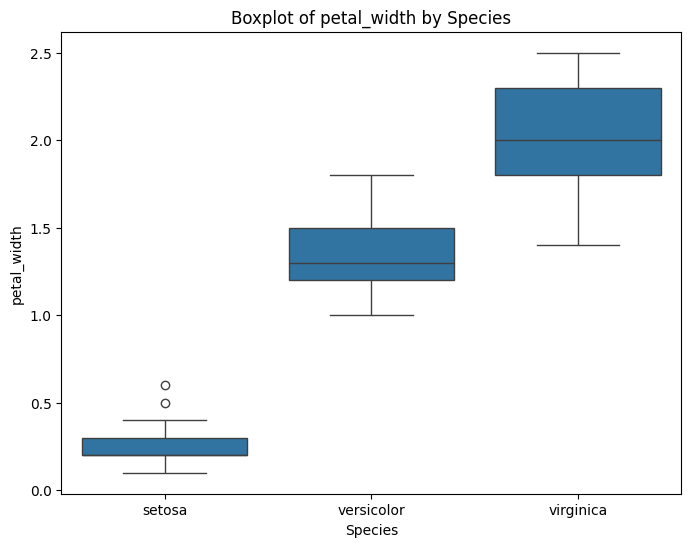

In [6]:
def additional_analysis(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing values in each column:")
    print(missing_values)
    
    # Correlation matrix visualization (excluding 'species' column)
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Drop 'species'
    plt.title('Correlation Matrix')
    plt.show()  # This will display the plot directly in the notebook

    # Boxplots for each feature
    for column in df.columns[:-1]:  # Skip the 'species' column
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='species', y=column, data=df)
        plt.title(f'Boxplot of {column} by Species')
        plt.xlabel('Species')
        plt.ylabel(column)
        plt.show()  # This will display the plot directly in the notebook

additional_analysis(df)


## 6. Principal Component Analysis (PCA)
In this section, we will perform Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and visualize it in two dimensions.


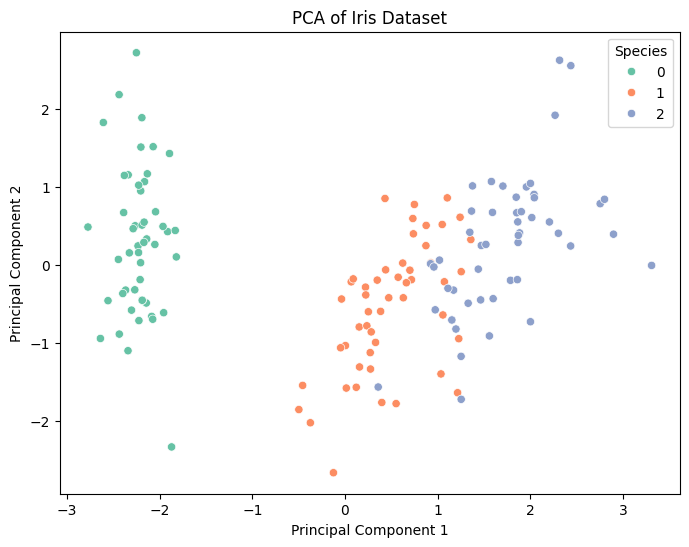

In [7]:
def perform_pca(df):
    # Encode species column as numerical values
    label_encoder = LabelEncoder()
    df['species_encoded'] = label_encoder.fit_transform(df['species'])

    # Features to apply PCA on (exclude species)
    features = df.columns[:-2]  # Exclude 'species' and 'species_encoded' columns
    X = df[features].values

    # Standardize the features before applying PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Create a DataFrame with the PCA results
    pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    pca_df['species'] = df['species_encoded']
    
    # Plot PCA results
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set2')
    plt.title('PCA of Iris Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Species')
    plt.show()  # This will display the plot directly in the notebook

perform_pca(df)


## 7. ANOVA Results for Each Feature
Finally, we will perform an ANOVA test to compare each feature across different species and display the results.


In [8]:
def perform_anova(df):
    anova_results = {}
    
    # Convert species to numerical values
    label_encoder = LabelEncoder()
    df['species_encoded'] = label_encoder.fit_transform(df['species'])

    # Perform ANOVA for each feature (skip 'species' and 'species_encoded')
    for column in df.columns[:-2]:  # Skip 'species' and 'species_encoded' columns
        species_groups = [df[df['species'] == species][column].values for species in df['species'].unique()]
        f_stat, p_val = stats.f_oneway(*species_groups)
        anova_results[column] = {'f-statistic': f_stat, 'p-value': p_val}
    
    return anova_results

anova_results = perform_anova(df)
print("\nANOVA Results for each feature:")
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result['f-statistic']:.2f}, p-value = {result['p-value']:.4f}")



ANOVA Results for each feature:
sepal_length: F-statistic = 119.26, p-value = 0.0000
sepal_width: F-statistic = 47.36, p-value = 0.0000
petal_length: F-statistic = 1179.03, p-value = 0.0000
petal_width: F-statistic = 959.32, p-value = 0.0000
